# Emotions Detection in Text

In [40]:
# EDA
import pandas as pd
import numpy as np

# Load Data Viz Pkgs
import seaborn as sns

# Load Text Cleaning Pkgs
import neattext.functions as nfx

# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import os

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

import mlflow
import mlflow.sklearn
import joblib
import os
import seaborn as sns
import matplotlib.pyplot as plt



In [41]:
# Load Dataset
# df = pd.read_csv("../../data/train.csv")
base_path = os.getcwd()
df = pd.read_csv(os.path.join(base_path, '../../data', 'cleaned_dataset.csv'), encoding='latin-1')
# Set or create an experiment
mlflow.set_experiment("emotion_detection_experiment_islem")

<Experiment: artifact_location='file:///c:/Users/iji/Documents/MLOps-project-master/MLOps-project-master/application/notebooks/sentiments_analysis/mlruns/877522482833514456', creation_time=1765450174427, experiment_id='877522482833514456', last_update_time=1765450174427, lifecycle_stage='active', name='emotion_detection_experiment_islem', tags={}>

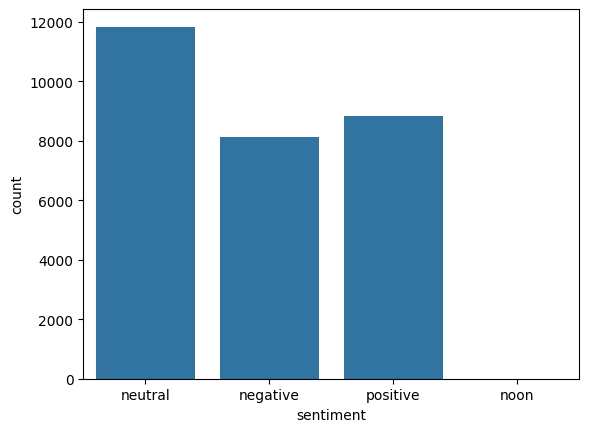

In [42]:
df.head()

# Data Exploration
sns.countplot(x='sentiment', data=df)
plt.savefig("sentiment_distribution.png")
mlflow.log_artifact("sentiment_distribution.png")

In [43]:
# Value Counts
df['sentiment'].value_counts()

sentiment
neutral     11836
positive     8831
negative     8114
noon            1
Name: count, dtype: int64

<Axes: xlabel='sentiment', ylabel='count'>

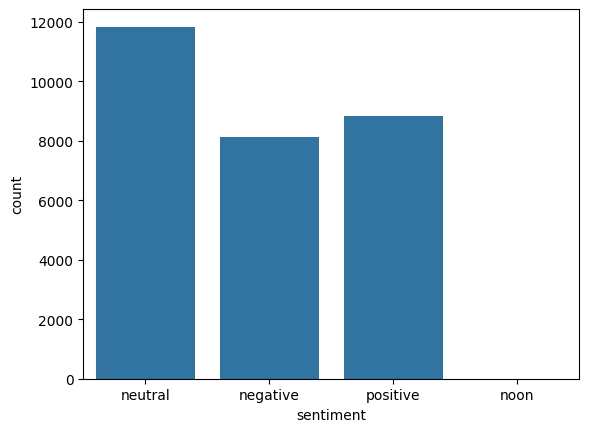

In [44]:
# Plot
sns.countplot(x='sentiment',data=df)

In [45]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [46]:
# Ensure all entries in the 'text' column are strings
df['text'] = df['text'].fillna("").astype(str)

In [47]:
# User handles
df['Clean_Text'] = df['text'].apply(nfx.remove_userhandles)

In [48]:
# Stopwords
df['Clean_Text'] = df['Clean_Text'].apply(nfx.remove_stopwords)

## We are not removing Special Characters as some of the rows have just Special Characters and it'll result into empty row.

In [49]:
df

,textID,text,selected_text,sentiment,Clean_Text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"I`d responded, going"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,Sooo SAD miss San Diego!!!
2,088c60f138,my boss is bullying me...,bullying me,negative,boss bullying me...
3,9642c003ef,what interview! leave me alone,leave me alone,negative,interview! leave
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"Sons ****, couldn`t releases bought"
...,...,...,...,...,...
28777,183709ebe3,Xbox,Xbox,neutral,Xbox
28778,2e180d0257,i m using right now and the video and camera q...,i m using right now and the video and camera q...,negative,right video camera quality soo bad.. bad camer...
28779,cebff34f77,Please show the SIM-Card holder and sim card! ...,Please show the SIM-Card holder and sim card! ...,positive,SIM-Card holder sim card! far know - hybrid ca...
28780,ee304e5fac,This man is so cute,This man is so cute,positive,man cute


In [50]:
# Features & Labels
Xfeatures = df['Clean_Text']
ylabels = df['sentiment']

# It is advisable to split before applying pipelines because it prevents data leakage.

In [51]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [52]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [53]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [54]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [55]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [56]:
# Check Accuracy
pipe_lr.score(x_test,y_test)
mlflow.end_run()


2025/12/11 12:10:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/12/11 12:10:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Logged model with accuracy: 0.69


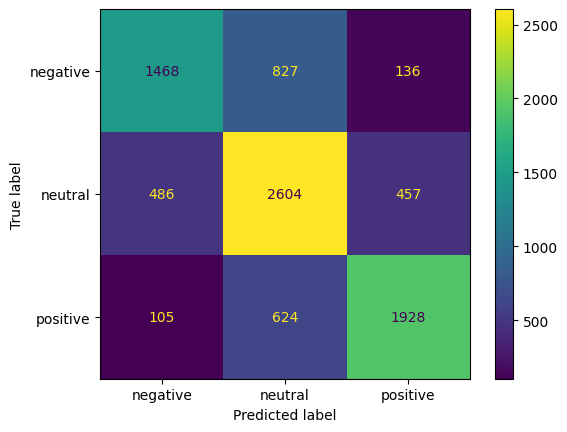

In [ ]:
# Start an MLflow run
with mlflow.start_run():
    # Train the model
    pipe_lr.fit(x_train, y_train)

    # Log model-related parameters
    mlflow.log_param("model_type", "Logistic Regression")
    mlflow.log_param("vectorizer", "CountVectorizer")
    mlflow.log_param("train_test_split", "70:30")
    mlflow.log_param("vocab_size", len(pipe_lr['cv'].vocabulary_))
    mlflow.log_param("max_iter", pipe_lr['lr'].max_iter)
    mlflow.log_param("solver", pipe_lr['lr'].solver)

    # Evaluate the model
    predictions = pipe_lr.predict(x_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions, average='weighted')
    recall = recall_score(y_test, predictions, average='weighted')
    f1 = f1_score(y_test, predictions, average='weighted')

    # Log metrics
    mlflow.log_metric("accuracy", accuracy)
    mlflow.log_metric("precision", precision)
    mlflow.log_metric("recall", recall)
    mlflow.log_metric("f1_score", f1)

    # Log confusion matrix as an artifact
    cm_display = ConfusionMatrixDisplay.from_estimator(pipe_lr, x_test, y_test)
    cm_display.figure_.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png")

    # Save cleaned dataset as an artifact
    df.to_csv("cleaned_dataset.csv", index=False)
    mlflow.log_artifact("cleaned_dataset.csv")

    # Log the model to MLflow
    mlflow.sklearn.log_model(pipe_lr, artifact_path="emotion_classifier_pipe_lr")

    # Optionally, save the model locally and log it as an artifact
    model_filepath = "models/emotion_classifier_pipe_lr.pkl"
    os.makedirs(os.path.dirname(model_filepath), exist_ok=True)
    joblib.dump(pipe_lr, model_filepath)
    mlflow.log_artifact(model_filepath)

    print(f"Logged model with accuracy: {accuracy:.2f}")
mlflow.end_run()

In [58]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [59]:
test_prediction = pipe_lr.predict([ex1])

In [60]:
y_true = ["positive"]
accuracy = accuracy_score(y_true, test_prediction)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 1.00


In [61]:
# Prediction Prob
proba = pipe_lr.predict_proba([ex1])
# Log prediction probabilities
mlflow.log_metric("avg_prediction_confidence", np.max(proba))

In [62]:
# To Know the classes
pipe_lr.classes_

array(['negative', 'neutral', 'noon', 'positive'], dtype=object)

In [63]:
import joblib
import os

model = pipe_lr  # Le pipeline prêt

save_path = "../../src/models/emotion_classifier_pipe_lr.pkl"

os.makedirs(os.path.dirname(save_path), exist_ok=True)

joblib.dump(model, save_path)

print("Model saved to:", save_path)



Model saved to: ../../src/models/emotion_classifier_pipe_lr.pkl
